# LogisticRegression概述
Logistic Regression(LR)是一種線性分類模型，之所以會叫做Logistic Regression是因為模型的函數形式參考了Logistic分配的累積機率函數，它的目的也是在給定訓練樣本集$T=\left\{(X_{1}, y_{1}),(X_{2}, y_{2}), \cdots,(X_{N}, y_{N})\right\}$，$X_i=(1,x_{i}^{(1)}, x_{i}^{(2)}, ......, x_{i}^{(m)})^T$且$y_i \in \{c_1,c_2,\cdots, c_K\}$有$K$種分類類別的情況下，估計給定樣本$X_i$下每個分類的條件機率$P(y_i=c_k|X_i)=p_k$，並把$X_i$分到$P(y_i=c_k|X_i)=p_k$最高的那一類當作$y_i$的輸出。

## 二項LR模型
### 模型設定
當分類為二分類問題時，給定$X$下$y$的輸出服從二項分配，即$y|X \sim bin(p)$，$y_i \in \{0,1\}$, $X\in R^{m+1}$，其中，$p=P(y=1|X)$。
接著，LR做了一項重要假設:

$$
p=P(y=1|X)=\frac{e^{(w \cdot X)}}{1+e^{(w \cdot X)}}
$$
因此
$$
1-p=P(y=0|X)=\frac{1}{1+e^{(w \cdot X)}}
$$

其中，$w=(b,w^{(1)},w^{(2)},\cdots,w^{(m)})^T$，接著我們定義勝算比為$\frac{p}{1-p}$，可推導得出對數勝算比為：

$$
log\left(\frac{p}{1-p}\right)=w\cdot X
$$

對數勝算比為$X$的線性函數，即為LR模型，我們的目標就是估計出$\hat w$，進一步能夠在未來輸入某個樣本$X_f$時，估計出$\hat p=P(y=1|X=X_f)$，若$\hat p > 0.5$我們就將1作為$X_f$的輸出，即$\hat y_f=1$。

### 模型學習算法
由於我們沒辦法觀察到訓練樣本的「對數勝算比」，能觀察到的$y$都是0或1的結果，因此想估計出$\hat w$採用最小平方法在此是不可行的，需要以二項分配的最大概似估計法來估計LR模型，假設$P(y=1|X)=g(X)=\frac{e^{w\cdot X}}{1+e^{w\cdot X}}$，以及$P(y=0|X)=1-g(X)$，經過實際抽樣後得到概似函數為：

$$
\prod_{i=1}^{N}\left(g(X_i)\right)^{y_i}\left(1-g(X_i)\right)^{1-y_i}
$$
對數概似函數$L(w)$為：
$$
L(w)=\sum_{i=1}^{N}\left[y_i log(g(X_i))+(1-y_i) log((1-g(X_i)))\right]=\sum_{i=1}^{N}\left\{y_i(w\cdot X_i)-log[1+e^{w\cdot X_i}] \right\}
$$

概似函數的目標是找到能使$L(w)$最大的$\hat w$，即：

$$
\max_{w} L(w)
$$

一般將其轉為損失函數形式表示：

$$
\min_{w} -L(w)=-\sum_{i=1}^{N}\left\{y_i(w\cdot X_i)-log[1+e^{w\cdot X_i}] \right\}
$$

而學習的算法可以採用座標下降法、梯度下降法或擬牛頓法求解。在sklearn中實現LR模型的過程中會有正則化項的參數可以選擇，因此下面說明比較常用的L1與L2正則化損失函數。兩者在概念上都如同對求解參數的過程中增加了模型複雜度的懲罰項。


#### L1正則化損失函數

L1正則化項的由來是相當於在模型中添加了一個先驗知識「參數$w$服從零均值的Laplace distribution」。<P>

Laplace distribution：

$$
f(w|\mu,b)=\frac{1}{2b}\exp\left(-\frac{|w-\mu|}{b} \right)
$$

加入w的先驗分配後模型的概似函數為：

$$
P(y|X,w)P(w)=\prod_{i=1}^{N}\left(g(X_i)\right)^{y_i}\left(1-g(X_i)\right)^{1-y_i}\prod_{j=1}^{m+1} \frac{1}{2b}\exp \left(-\frac{|w_j|}{b}\right)
$$

取對數後加上負號轉為目標損失函數為：
    
$$
\min_{w} -L(w)=-\sum_{i=1}^{N}\left\{y_i(w\cdot X_i)-log[1+e^{w\cdot X_i}] \right\}+\frac{1}{2b^2}\sum_{j}^{m+1}|w_j|
$$

令$J(w)=-\sum_{i=1}^{N}\left\{y_i(w\cdot X_i)-log[1+e^{w\cdot X_i}] \right\}$，並將其一般化表示：
    
$$
\min_{w} C\cdot J(w)+\sum_{j}^{m+1}|w_j| \tag{1}
$$
    
其中，正則化項$\sum_{j}^{m+1}|w_j|$代表模型的複雜度，而C為模型複雜度的懲罰項，C越大，表示對於越複雜的模型處罰程度越小。在sklearn中模型的目標函數也是如(1)式表示。

#### L2正則化損失函數

L2正則化項的由來是相當於也是在模型中添加了一個先驗知識「參數$w$服從零均值的Normal distribution」。<P>

Normal distribution:

$$
f(w|\mu,\sigma)=\frac{1}{\sqrt{2\pi} \sigma}\exp\left(-\frac{(w-\mu)^2}{2\sigma^2} \right)
$$

加入w的先驗分配後模型的概似函數為：

$$
P(y|X,w)P(w)=\prod_{i=1}^{N}\left(g(X_i)\right)^{y_i}\left(1-g(X_i)\right)^{1-y_i} \frac{1}{\sqrt{2\pi} \sigma}\exp \left(-\frac{w^T w}{2\sigma^2}\right)
$$
    
    
取對數後加上負號轉為目標損失函數為：
    
$$
\min_{w} -L(w)=-\sum_{i=1}^{N}\left\{y_i(w\cdot X_i)-log[1+e^{w\cdot X_i}] \right\}+\frac{1}{2\sigma^2} \left(w^T w \right)
$$


令$J(w)=-\sum_{i=1}^{N}\left\{y_i(w\cdot X_i)-log[1+e^{w\cdot X_i}] \right\}$，並將其一般化表示：
    
$$
\min_{w} C\cdot J(w)+ w^T w
$$
    
比較L1L2兩者可發現L1對於每個參數的權重都為1，因此模型會傾向留下重要的特徵參數，捨棄掉那些不重要的特徵參數，這也是為什麼L1正則化在LR模型中可以用來進行特徵篩選；而L2正則化由於權重為參數的平方，因此模型會盡可能的讓參數的值集中，不讓某個參數特別大也不讓參數為0。

# 補充：多項LR 模型
多項LR模型對於機率分配、模型的設定如下：

$$P(y=c_k | X)=\frac{e^{\left(w_{k} \cdot X\right)}}{1+\sum_{k=1}^{K-1} e^{\left(w_{k} \cdot X\right)}}, \quad k=1,2, \cdots, K-1$$

$$P(y=c_K | X)=\frac{1}{1+\sum_{k=1}^{K-1} e^{ \left(w_{k} \cdot X\right)}}$$

例如：
$$P(y=c_1 | X)=\frac{e^{\left(w_{1} \cdot X\right)}}{1+\sum_{k=1}^{K-1} e^{\left(w_{k} \cdot X\right)}}, \quad k=1,2, \cdots, K-1$$
其中，$w_1=(w_{11},w_{12},\cdots, w_{1n})^T$<br>

# python sklearn實現LR模型
下方將透過sklearn內建的乳腺癌數據集實現LR模型，首先3.1比較L1 L2損失函數的差異，3.2對於建模參數C調整，3.3嘗試透過LR模型的L1損失特性將模型降維並比較在不同C的設置下降維是否有讓模型預測表現更好。

## L1與L2損失函數

In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
X.data.shape 
y.data.shape 

(569,)

In [3]:
# 分別建立L1 L2損失函數下的LR模型 
# C可以對應到上述模型複雜度的懲罰項；max_iter為算法迭代時的次數（另一個角度思考也如同迭代過程中的學習率）
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=100)
 
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=100)
 
# 屬性coef_取得LRL1模型參數
lrl1 = lrl1.fit(X,y)
print(lrl1.coef_)

# 統計LRL1模型有多少參數為0， 只有10個參數不為0
(lrl1.coef_ != 0).sum(axis=1)

[[ 2.38078973e+00  2.24296797e-02 -1.99925916e-03 -7.58945902e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.18780084e-01
   0.00000000e+00 -7.44592730e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.39421708e-01 -2.34685229e-01 -1.39332670e-01 -2.12700713e-02
   0.00000000e+00  0.00000000e+00 -2.78132129e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([11])

In [4]:
# 根據上述，可發現L1損失傾向減少相對不重要的參數，因此L1損失在LR模型下可以作為一種特徵篩選的方式
lrl2 = lrl2.fit(X,y)
lrl2.coef_
# L2結果則相反

array([[ 1.61542934e+00,  1.02253813e-01,  4.76562489e-02,
        -4.41980370e-03, -9.40558971e-02, -3.01378579e-01,
        -4.55817302e-01, -2.22080941e-01, -1.35394930e-01,
        -1.93845757e-02,  1.64619520e-02,  8.83893019e-01,
         1.21534483e-01, -9.48292990e-02, -9.79505581e-03,
        -2.39405778e-02, -5.73400346e-02, -2.69941553e-02,
        -2.77216156e-02,  1.64691344e-04,  1.26641489e+00,
        -3.01753017e-01, -1.72995716e-01, -2.21930423e-02,
        -1.73014146e-01, -8.79117636e-01, -1.16294227e+00,
        -4.27136873e-01, -4.19791895e-01, -8.69740014e-02]])

## C與模型表現間的關係

In [5]:
l1 = []
l2 = []
l1test = []
l2test = []
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=200)
 
for i in np.linspace(0.05,1.5,19):
    l1lr = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    l2lr = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    l1lr = l1lr.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(l1lr.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(l1lr.predict(Xtest),Ytest))
    
    l2lr = l2lr.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

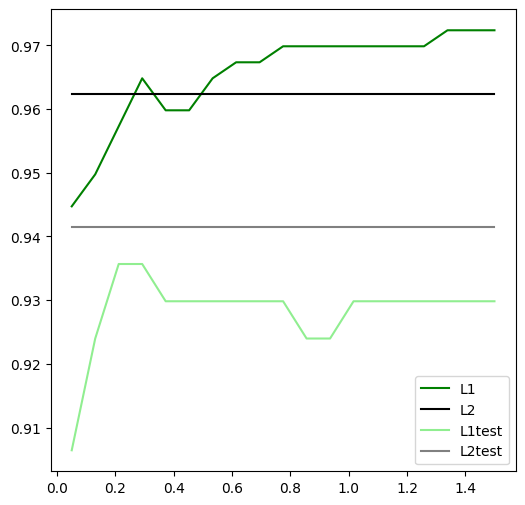

In [6]:
# 繪製C與模型表現間的關係
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]   


plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1.5,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) 
plt.show()

## 降維建模
目前模型使用了30個特徵，在此嘗試透過L1損失函數降維並建模，並以交叉驗證的方式觀察模型的表現是否有提升。

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [8]:
# 未降維模型 將C設置為1
data = load_breast_cancer()
LR_ = LR(solver="liblinear",C=1,random_state=200)

# 觀察在10折交叉驗證下的模型的平均準確率
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9490601503759398

In [9]:
# 透過LR模型的L1損失函數（norm_order=1）降低維度
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)

# 看看降維後剩多少個特徵
print(X_embedded.shape)

# 10折交叉驗證下的模型的平均準確率
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

(569, 9)


0.9368107769423559

上面的降維比較僅在於C=1的情況下，在這邊可以推廣到在不同的C設置下，比較降維前後模型的預測表現，以繪圖的方式呈現

0.9561090225563911 8.01


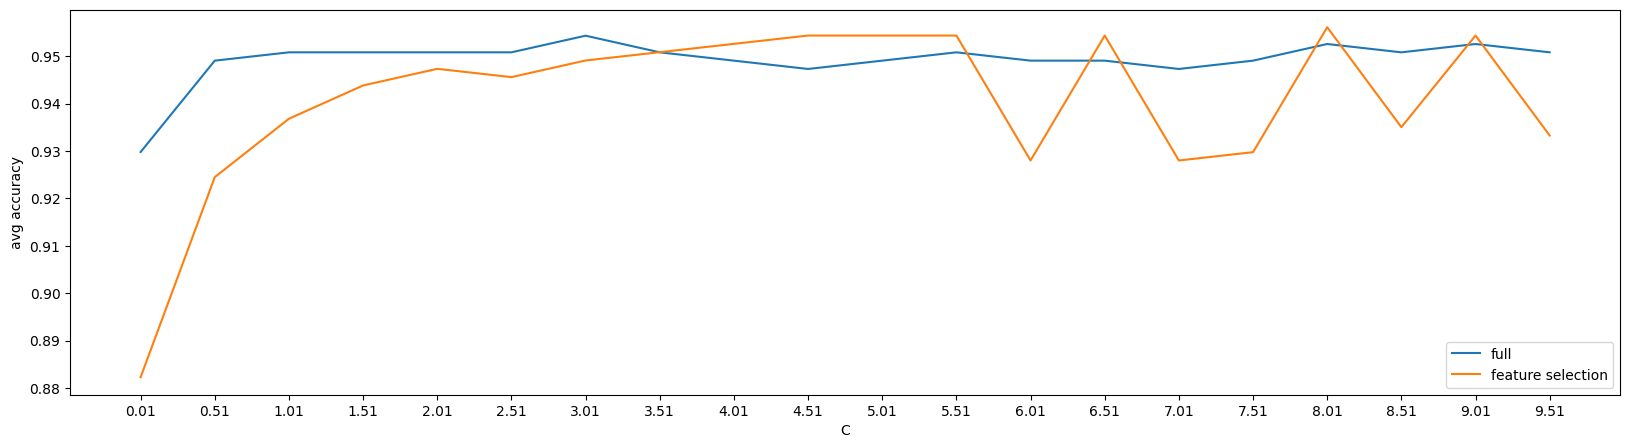

In [10]:
full_x = []
fs_x = []
C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=200)
    
    full_x.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fs_x.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    
print(max(fs_x),C[fs_x.index(max(fs_x))])
 
plt.figure(figsize=(20,5))
plt.plot(C,full_x,label="full")
plt.plot(C,fs_x,label="feature selection")
plt.xticks(C)
plt.ylabel("avg accuracy")
plt.xlabel("C")
plt.legend()
plt.show()

可以發現在某些時候，降維後的模型優於降維前，在C=8.01時，降維的模型平均準確率達到最高。
接著嘗試看看縮小C的範圍並增加C的取值數量看看模型是否還能更好，做法是讓C的範圍介於3~8之間並且每隔0.01就取一個值。
作法如下：

0.9561090225563911 5.79999999999994


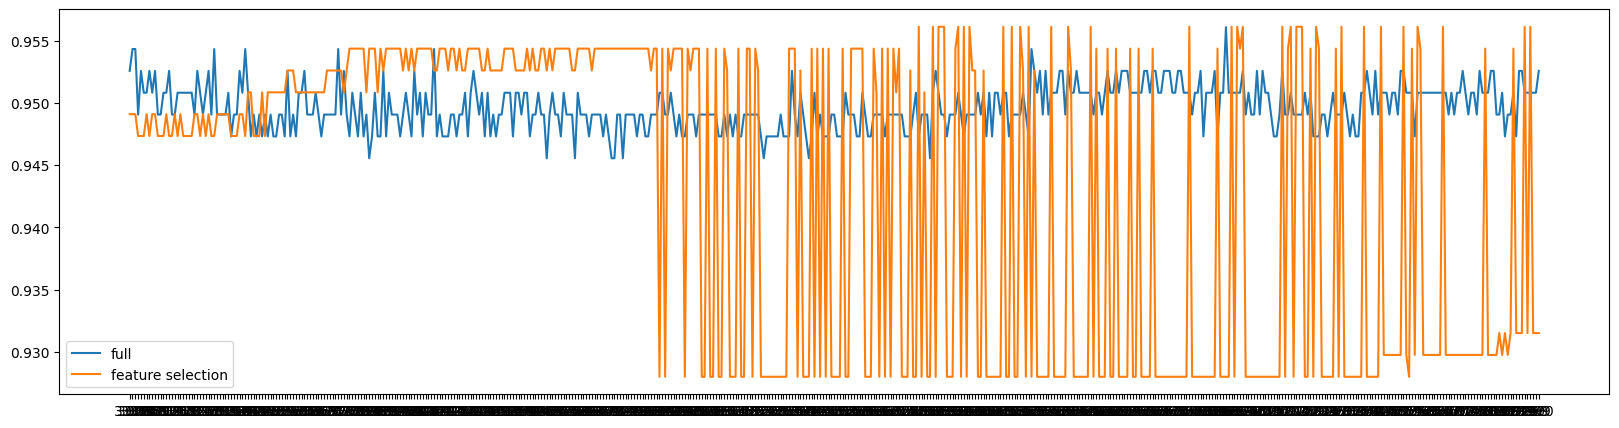

In [11]:
full_x = []
fs_x = []
 
C=np.arange(3,8.01,0.01)
 
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=200)
    
    full_x.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fs_x.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    
print(max(fs_x),C[fs_x.index(max(fs_x))])
 
plt.figure(figsize=(20,5))
plt.plot(C,full_x,label="full")
plt.plot(C,fs_x,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()
 

In [12]:
# 驗證在C=5.79999999999994，降維前模型的表現
LR_ = LR(solver="liblinear",C=5.79999999999994,random_state=200)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9473057644110275

In [13]:
# 驗證在C=5.79999999999994，降維後模型的表現
LR_ = LR(solver="liblinear",C=5.79999999999994,random_state=200)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9561090225563911

In [14]:
# 看看究竟降了多少維度
X_embedded.shape

(569, 9)